In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
from matplotlib.ticker import FuncFormatter
from mpld3 import plugins
%matplotlib inline

In [208]:
#Los retornos y variaciones están en Porcentaje %
archivo = 'ML bis.xlsx'
hoja = 'Indices EMEs'
columnas = ("A,B,C,D,E,F,G,H,I") #Solo las columnas qque contienen los precios, incluye la columna del indice también
index=0 #Solo seleccionar una columna para las fechas de todas las series(comparten índice)

#Ingrese el Last Policy decision date 'yyyy-mm-dd' (COPOM Proxy)-> se ocupa para graficar el cumulative return
policy_date = '2023-09-28'

#Para ver el cambio en 20 días de los indices especifica la fecha de referencia (o déjala en blanco para usar todo el historial)
fecha_referencia = '2023-06-22'  #'yyyy-mm-dd'

#header y skiprows van de la mano (header selecciona la fila que corresponde al encabezado=nombre de los indices)
#skiprows son las filas que no queremos que aparezcan en el data frame, con la finalidad de que solo haya datos numericos

indices = pd.read_excel(archivo, sheet_name=hoja, header=3, usecols=columnas, skiprows=[4,5,6],index_col=index)
indices



,JGENVUUG Index,LEGATRUU Index,SBEMGBL Index,BEM92A Index,GEMXEMB1 Index,BCUU1A Index,WSOV Index,WILS Index
2010-01-04,242.6875,402.6309,114.9510,181.2348,108.5426,269.8172,134.277,100.585
2010-01-05,243.7383,403.7820,115.1832,181.8482,108.6835,269.8454,134.625,100.623
2010-01-06,244.2756,402.3549,115.3945,182.3050,109.1072,269.1569,133.943,100.393
2010-01-07,243.9715,401.4552,115.4795,182.7807,108.7386,268.9659,133.570,100.316
2010-01-08,244.9214,401.9560,115.7001,182.7250,109.4649,269.4052,133.753,100.466
...,...,...,...,...,...,...,...,...
2023-10-05,264.7218,431.4656,260.0557,246.5623,133.8411,330.7806,135.577,124.315
2023-10-06,264.5202,431.6016,260.1709,246.0615,133.6810,330.0430,136.031,124.929
2023-10-10,267.7603,435.5605,260.5601,249.4037,134.8338,335.2428,136.768,126.185
2023-10-11,270.0508,437.4015,260.7030,251.7759,135.4671,338.2408,137.386,127.212


In [201]:
#Preguntar si lo dejo en porcentaje o en unidades
indices
#Daily change
df_daily_returns = indices.pct_change()*100
#MoM Change (20 days)
retornos_m = indices.pct_change(20)*100


In [202]:
df_daily_returns.tail(5)

,JGENVUUG Index,LEGATRUU Index,SBEMGBL Index,BEM92A Index,GEMXEMB1 Index,BCUU1A Index,WSOV Index,WILS Index
2023-10-05,0.000000,0.000000,0.000000,-0.068212,0.000000,0.000000,-0.285368,-0.319133
2023-10-06,-0.076155,0.031520,0.044298,-0.203113,-0.119619,-0.222988,0.334865,0.493907
2023-10-10,1.224897,0.917258,0.149594,1.358278,0.862351,1.575492,0.541788,1.005371
2023-10-11,0.855429,0.422674,0.054843,0.951149,0.469689,0.894277,0.451860,0.813884
2023-10-12,-0.376522,-0.711612,0.000000,-0.203276,0.000000,-0.933181,-0.625974,-0.867843


In [203]:
df_monthly_returns = indices.asfreq('M', method='pad')
df_monthly_returns = df_monthly_returns.pct_change()*100
df_monthly_returns


,JGENVUUG Index,LEGATRUU Index,SBEMGBL Index,BEM92A Index,GEMXEMB1 Index,BCUU1A Index,WSOV Index,WILS Index
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,1.122331,0.074427,0.893700,1.125688,1.081271,-1.381671,0.294186,-1.052302
2010-03-31,4.011938,-0.755817,1.260303,4.024347,4.067065,1.414906,-1.317719,1.278845
2010-04-30,1.571362,0.016094,1.192632,2.442314,0.758483,1.078396,-0.123724,1.075258
2010-05-31,-4.344859,-1.563117,0.531899,-4.974433,-4.062222,-3.798293,-1.021233,-3.761752
...,...,...,...,...,...,...,...,...
2023-05-31,-1.578936,-1.954765,0.825233,-1.076559,-0.894350,-2.420900,-2.020098,-2.371278
2023-06-30,3.259926,-0.007826,0.714729,3.030924,2.488940,2.099159,-0.295533,1.930505
2023-07-31,2.877341,0.692489,0.405207,3.613049,2.402207,1.038940,0.536060,1.072782
2023-08-31,-2.686885,-1.368010,0.231597,-2.548955,-2.306685,-1.963498,-1.532693,-1.879058


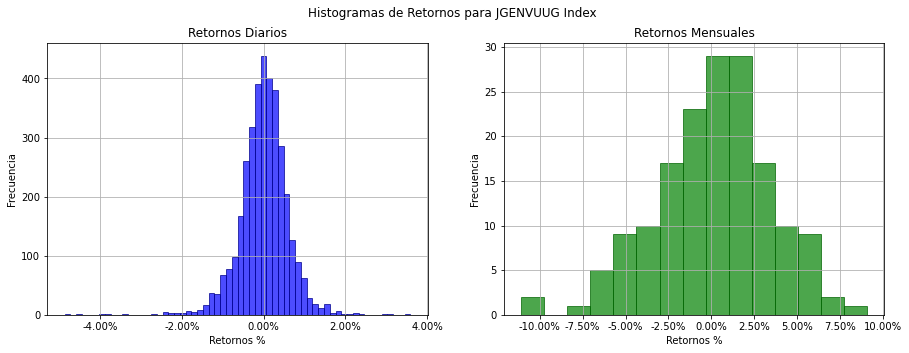

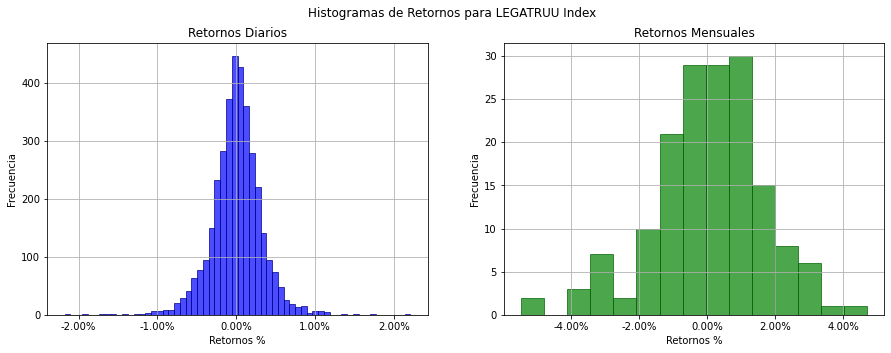

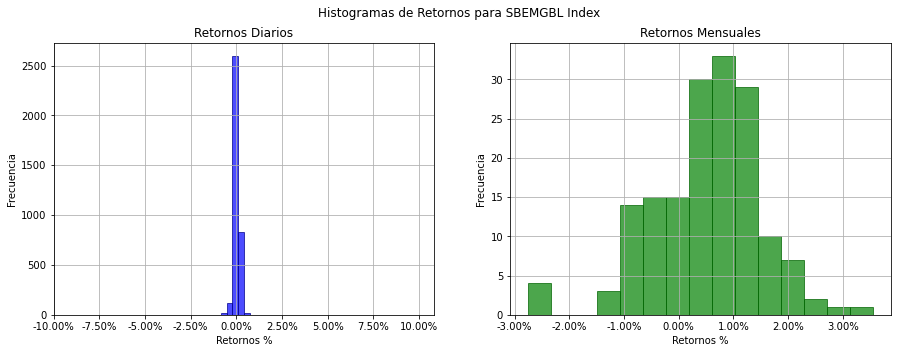

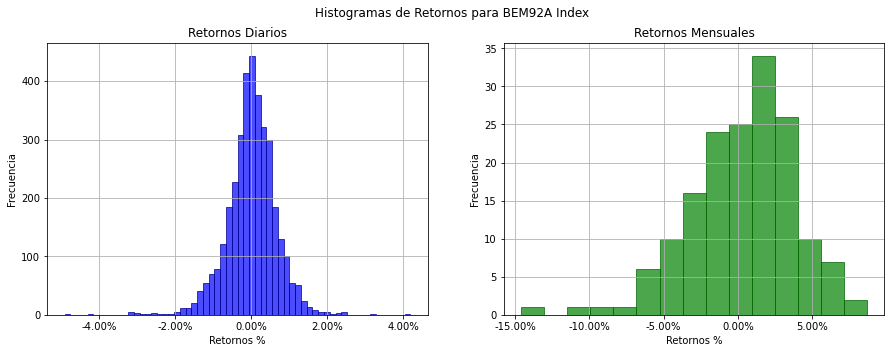

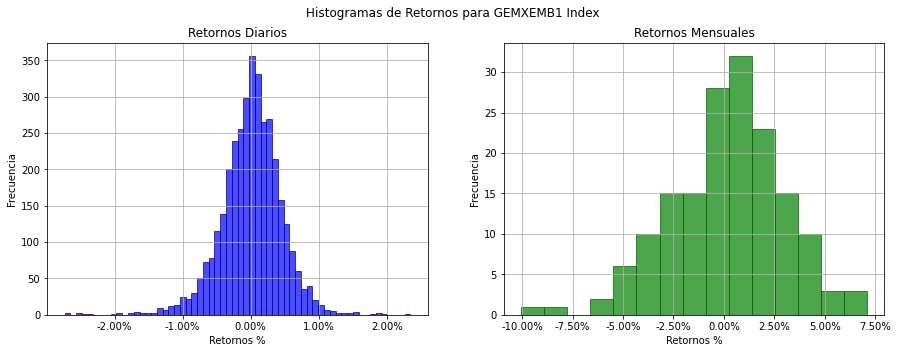

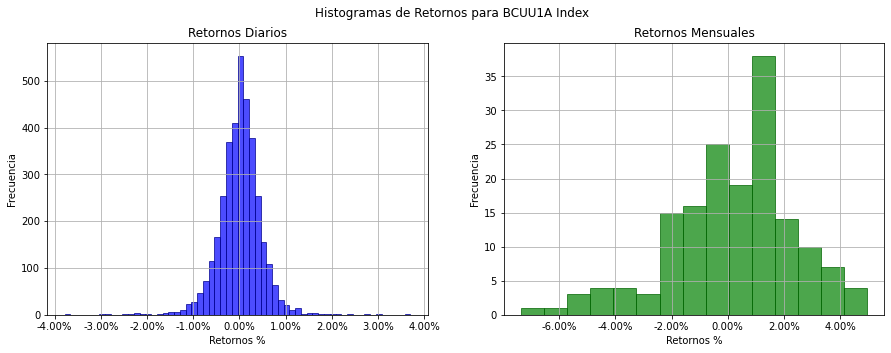

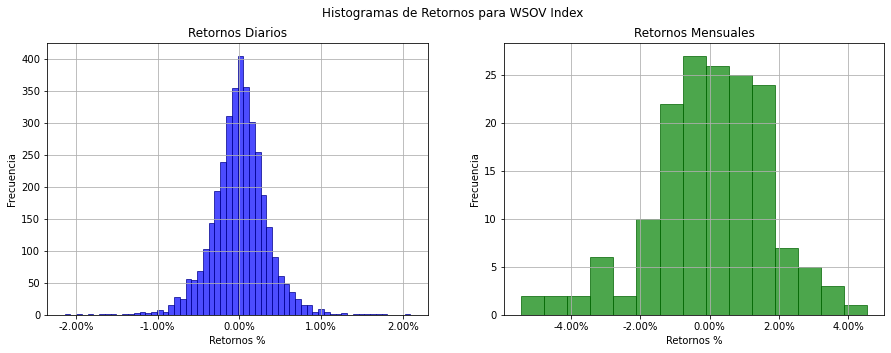

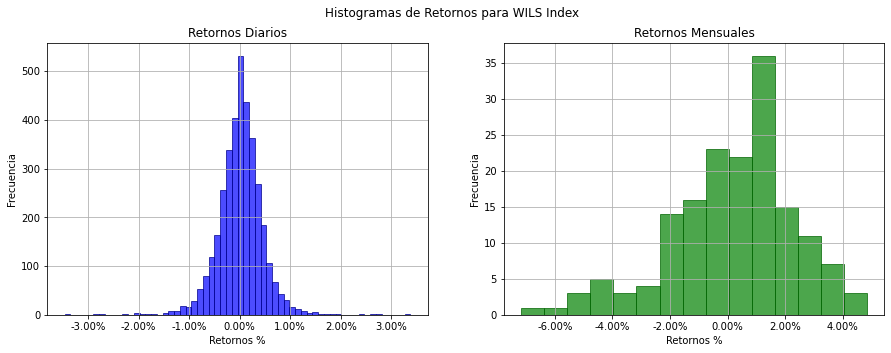

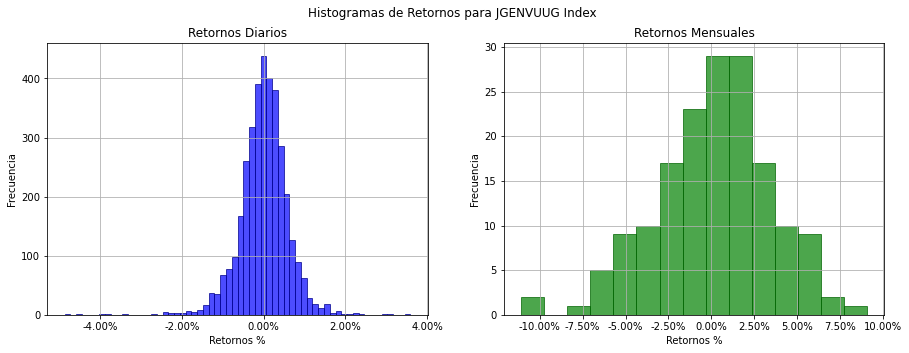

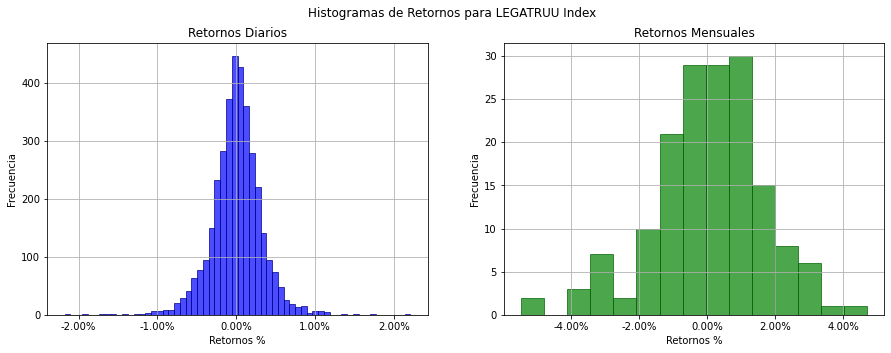

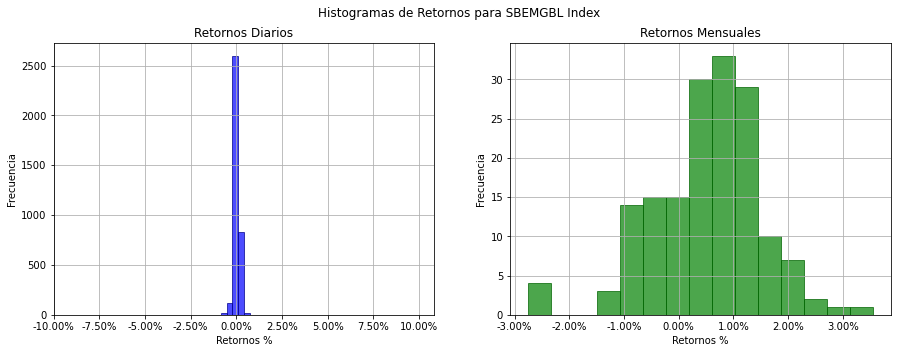

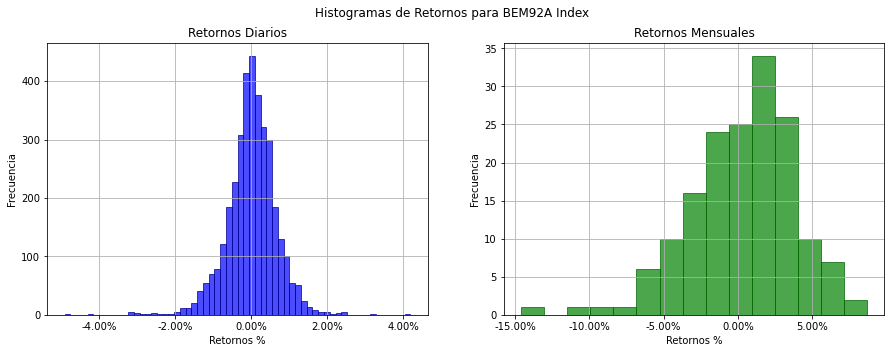

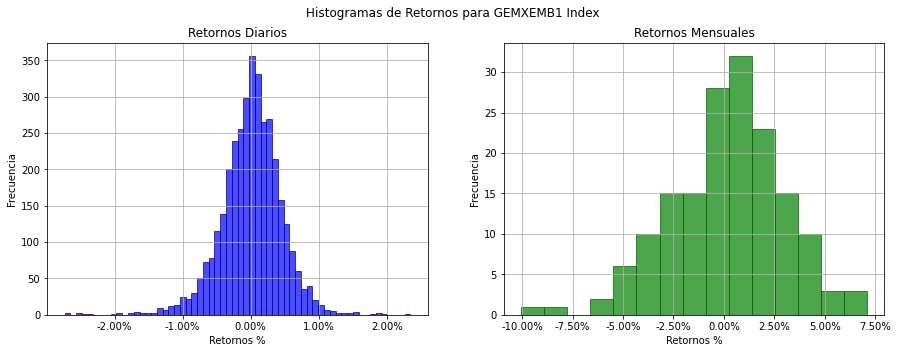

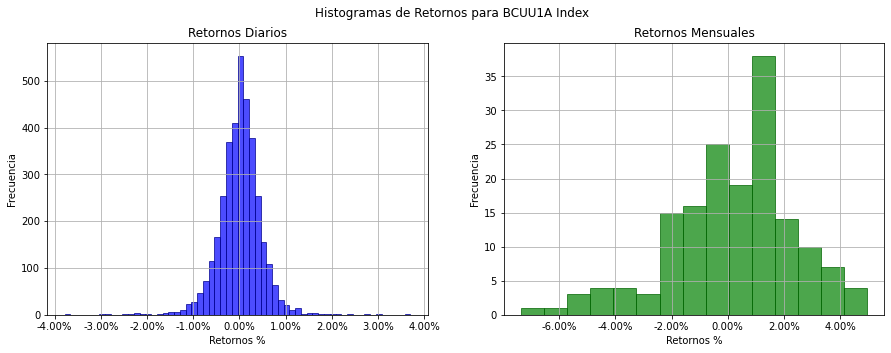

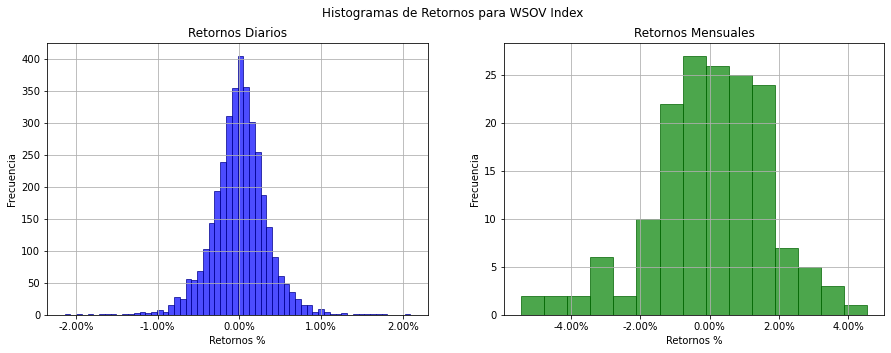

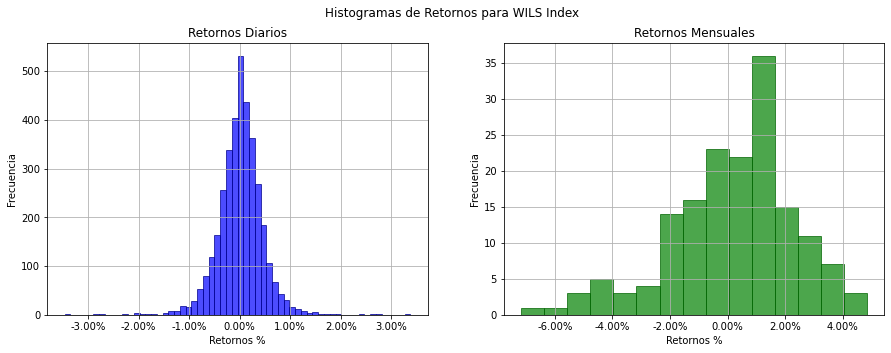

In [228]:
# Combina los DataFrames en uno solo
combined_df = pd.concat([df_daily_returns, df_monthly_returns], axis=1)
# Itera a través de las columnas (índices)
for index_name in combined_df.columns:
    grafica1=[]
    # Crea una figura con dos subplots, uno para los retornos diarios y otro para los retornos mensuales
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Histogramas de Retornos para {index_name}')
    
    # Histograma de retornos diarios
    axes[0].hist(df_daily_returns[index_name], bins=60, color='b', alpha=0.7, edgecolor='darkblue')
    axes[0].set_title('Retornos Diarios')
    axes[0].set_xlabel('Retornos %')
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(True)
    axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))
    
    
    # Histograma de retornos mensuales
    axes[1].hist(df_monthly_returns[index_name], bins=15, color='g', alpha=0.7, edgecolor='darkgreen')
    axes[1].set_title('Retornos Mensuales')
    axes[1].set_xlabel('Retornos %')
    axes[1].set_ylabel('Frecuencia')
    axes[1].grid(True)
    axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}%'))


    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


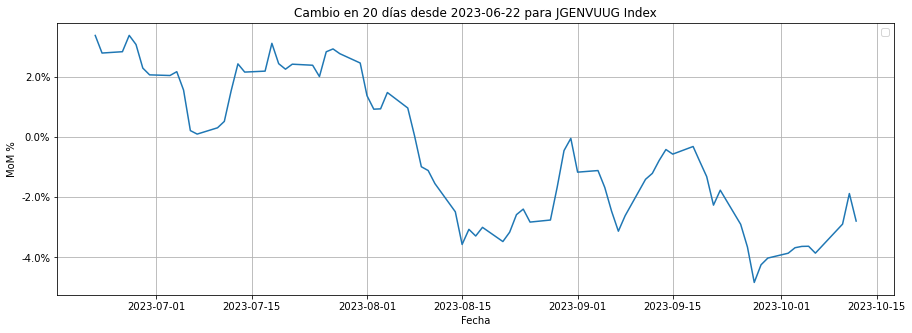

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


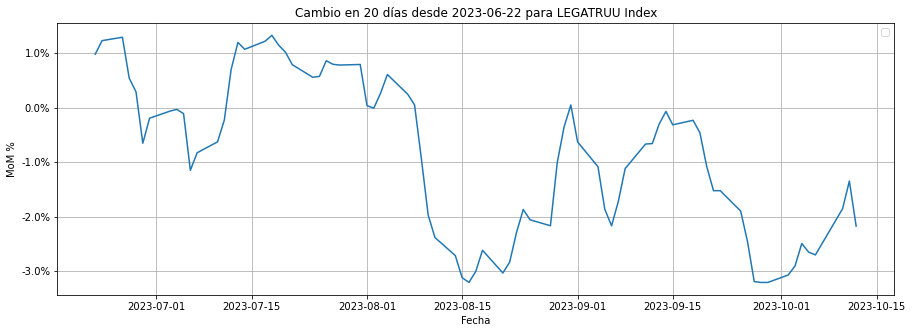

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


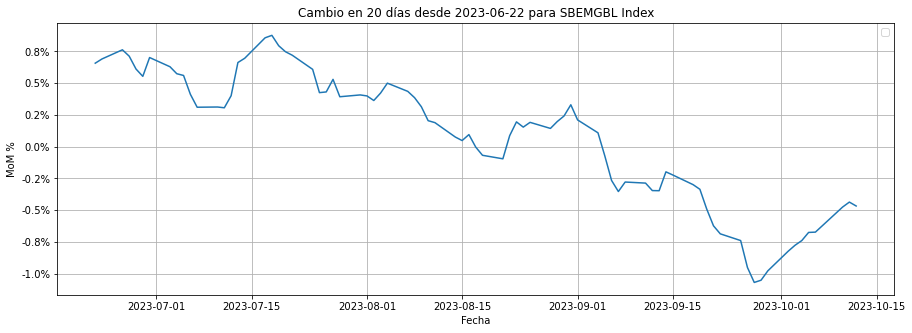

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


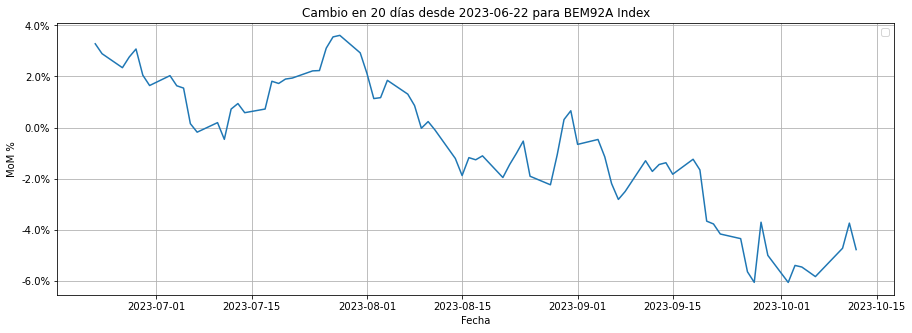

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


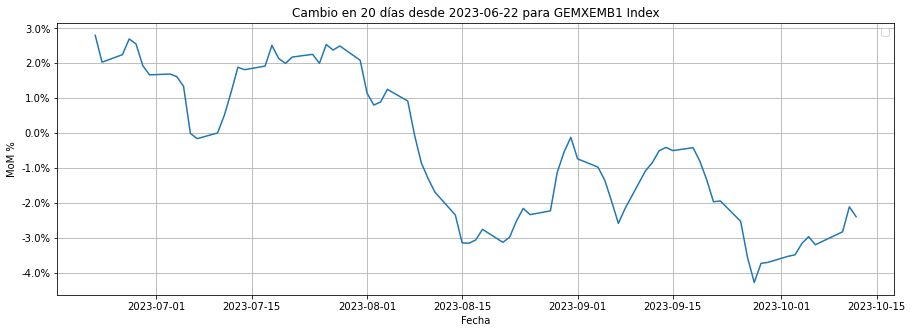

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


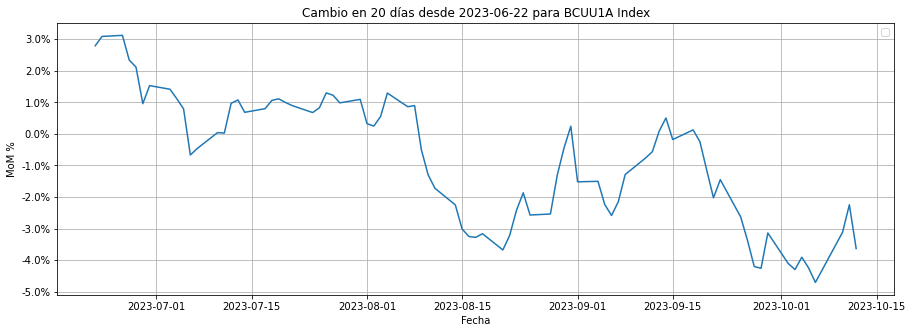

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


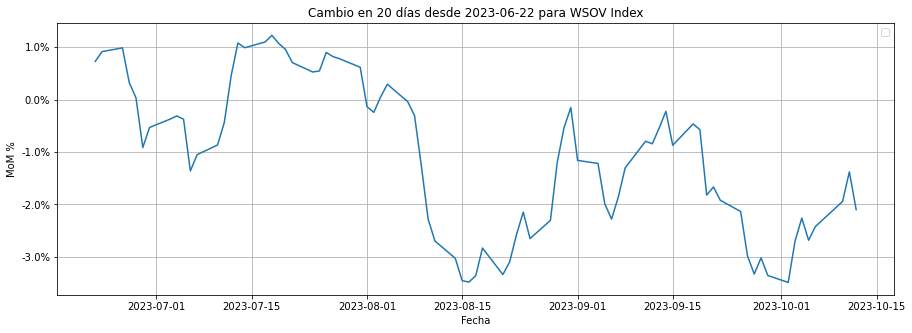

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


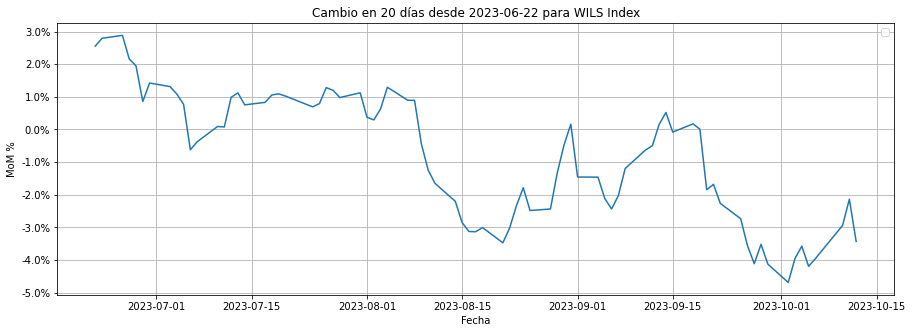

In [205]:
# Si se proporciona una fecha de referencia, filtra los datos a partir de esa fecha
if fecha_referencia:
    retornos_m = retornos_m.loc[fecha_referencia:]

for columna in retornos_m.columns:
    plt.figure(figsize=(15, 5))
    plt.plot(retornos_m[columna], linewidth=1.5)
    if fecha_referencia:
        plt.title(f'Cambio en 20 días desde {fecha_referencia} para {columna}')
    else:
        plt.title(f'Cambio en 20 días para {columna}')
    plt.xlabel('Fecha')
    plt.ylabel('MoM %')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))
    plt.legend()
    plt.grid(True)
    plt.show()

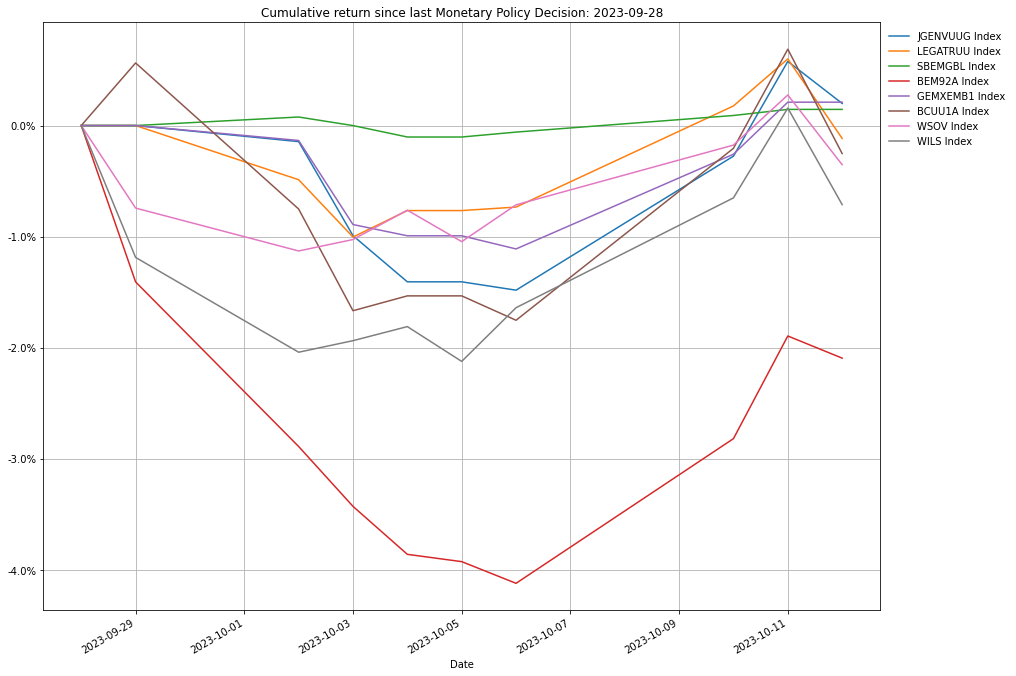

In [206]:
#Cumulative Return
episodio = indices.loc[policy_date:]

# Calcula el rendimiento acumulativo
daily_return = episodio.pct_change().fillna(0)  # Period Return
daily_return_plus_one = daily_return.add(1)
cumulative_return = daily_return_plus_one.cumprod().sub(1)

# Multiplica por 100 y traza el rendimiento acumulativo
cumulative_return.mul(100).plot(figsize=(15, 12))
plt.title(f'Cumulative return since last Monetary Policy Decision: {policy_date}',)
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))
# Function add a legend   
plt.legend(bbox_to_anchor =(1,1), frameon=False) 
plt.grid(True)
plt.show()

In [185]:
#SE ABRE EL SEGUNDO ARCHIVO DONDE ESTAN LOS TIPOS DE CAMBIO

archivo = 'Tipos de cambio bloomberg.xlsx'
sheet_name = 'Datos'
columnas=("A,B,E,H,K,N,Q,T,W,Z,AC,AF,AI,AL,AO,AR,AU,AX,BA,BD,BG,BM,BP,BS,BV,BY,CB")
index=0
#introducir año a partir del cual se quiere hacer YTD yyyy-mm-dd
anio = '2023-01-01'
exch_rate = pd.read_excel(archivo, sheet_name=hoja, header=2, usecols=columnas, skiprows=[3,4,5,6,],index_col=index)

In [186]:
exch_rate 

,Argentina,Belarus,Brazil,Canada,Chile,China,Colombia,Hungary,India,Indonesia,...,Philippines,Poland,Russia,South Africa,Switzerland,Thailand,Turkey,Ukraine,United Kingdom,Uruguay
1990-01-03,NaN,NaN,NaN,1.1613,297.37,4.7339,NaN,NaN,16.9600,NaN,...,NaN,NaN,NaN,2.5780,1.5785,25.710,0.0023,NaN,0.6202,NaN
1990-01-04,NaN,NaN,NaN,1.1614,297.37,4.7339,NaN,NaN,16.9900,NaN,...,NaN,NaN,NaN,2.5300,1.5420,25.700,0.0023,NaN,0.6114,NaN
1990-01-05,NaN,NaN,NaN,1.1600,297.37,4.7339,NaN,NaN,16.9400,NaN,...,NaN,NaN,NaN,2.5375,1.5370,25.800,0.0023,NaN,0.6109,NaN
1990-01-08,NaN,NaN,NaN,1.1601,297.37,4.7339,NaN,NaN,16.9300,NaN,...,NaN,NaN,NaN,2.5300,1.5238,25.710,0.0023,NaN,0.6050,NaN
1990-01-09,NaN,NaN,NaN,1.1614,297.37,4.7339,NaN,NaN,16.9300,NaN,...,NaN,NaN,NaN,2.5395,1.5270,25.740,0.0023,NaN,0.6031,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,350.0208,27482.0,5.1848,1.3705,921.65,7.2980,4366.98,368.35,83.2563,15618.0,...,56.678,4.3794,118.6895,19.5757,0.9123,36.920,27.5665,36.6475,0.8228,39.2779
2023-10-06,350.0775,27482.0,5.1460,1.3661,918.74,7.2980,4339.40,365.48,83.2462,15613.0,...,56.630,4.3278,118.6895,19.3000,0.9098,37.022,27.6124,36.6057,0.8172,39.2866
2023-10-10,350.0405,27482.0,5.0544,1.3583,930.47,7.2940,4229.44,365.52,83.2525,15739.0,...,56.875,4.2805,118.6895,19.0181,0.9045,36.743,27.7181,36.5858,0.8139,39.8725
2023-10-11,350.0697,27482.0,5.0504,1.3593,928.52,7.3007,4229.66,363.73,83.1850,15700.0,...,56.762,4.2606,118.6895,18.8269,0.9020,36.417,27.7087,36.5221,0.8121,39.8209


In [187]:
exch_rate = exch_rate.loc[anio:]
exch_rate

,Argentina,Belarus,Brazil,Canada,Chile,China,Colombia,Hungary,India,Indonesia,...,Philippines,Poland,Russia,South Africa,Switzerland,Thailand,Turkey,Ukraine,United Kingdom,Uruguay
2023-01-03,178.3759,27482.0,5.4627,1.3671,859.50,6.9150,4896.24,379.43,82.8887,15598.0,...,55.808,4.4324,118.6895,17.0131,0.9360,34.405,18.7218,36.7514,0.8355,39.7975
2023-01-04,178.6630,27482.0,5.4316,1.3478,855.61,6.8973,4929.67,373.11,82.8075,15588.0,...,55.908,4.4008,118.6895,16.8839,0.9298,34.045,18.7460,36.8757,0.8296,39.8575
2023-01-05,178.9350,27482.0,5.3529,1.3570,852.75,6.8804,4966.75,376.53,82.5538,15608.0,...,55.775,4.4528,118.6895,17.1665,0.9362,33.950,18.7644,36.7843,0.8398,39.9050
2023-01-06,179.2479,27482.0,5.2250,1.3444,841.00,6.8280,4855.48,370.72,82.7263,15633.0,...,55.637,4.4114,118.6895,17.1070,0.9279,34.045,18.7165,36.7514,0.8269,39.9050
2023-01-09,180.1059,27482.0,5.2585,1.3389,835.50,6.7719,4855.48,369.48,82.3575,15568.0,...,55.135,4.3752,118.6895,16.9274,0.9213,33.490,18.7532,36.9659,0.8208,39.8400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,350.0208,27482.0,5.1848,1.3705,921.65,7.2980,4366.98,368.35,83.2563,15618.0,...,56.678,4.3794,118.6895,19.5757,0.9123,36.920,27.5665,36.6475,0.8228,39.2779
2023-10-06,350.0775,27482.0,5.1460,1.3661,918.74,7.2980,4339.40,365.48,83.2462,15613.0,...,56.630,4.3278,118.6895,19.3000,0.9098,37.022,27.6124,36.6057,0.8172,39.2866
2023-10-10,350.0405,27482.0,5.0544,1.3583,930.47,7.2940,4229.44,365.52,83.2525,15739.0,...,56.875,4.2805,118.6895,19.0181,0.9045,36.743,27.7181,36.5858,0.8139,39.8725
2023-10-11,350.0697,27482.0,5.0504,1.3593,928.52,7.3007,4229.66,363.73,83.1850,15700.0,...,56.762,4.2606,118.6895,18.8269,0.9020,36.417,27.7087,36.5221,0.8121,39.8209


In [188]:
exch_rate.iloc[[-1]]

,Argentina,Belarus,Brazil,Canada,Chile,China,Colombia,Hungary,India,Indonesia,...,Philippines,Poland,Russia,South Africa,Switzerland,Thailand,Turkey,Ukraine,United Kingdom,Uruguay
2023-10-12,350.026,27482.0,5.0504,1.369,934.35,7.3029,4214.5,366.83,83.245,15700.0,...,56.67,4.2999,118.6895,18.9523,0.9084,36.178,27.7537,36.515,0.819,39.85


In [189]:
year_to_policy = (exch_rate.loc[policy_date]/exch_rate.iloc[0]-1)*-100
year_to_policy =pd.DataFrame(year_to_policy)
year_to_policy

,0
Argentina,-96.228414
Belarus,-0.000000
Brazil,7.866074
Canada,1.345915
Chile,-5.497382
China,-5.538684
Colombia,16.757144
Hungary,2.208576
India,-0.366516
Indonesia,0.500064


In [190]:
policy_to_date = (exch_rate.iloc[-1]/exch_rate.loc[policy_date]-1)*-100
policy_to_date = pd.DataFrame(policy_to_date)
policy_to_date 

,0
Argentina,-0.000514
Belarus,-0.000000
Brazil,-0.345718
Canada,-1.505153
Chile,-3.043838
China,-0.067142
Colombia,-3.403774
Hungary,1.137313
India,-0.063107
Indonesia,-1.159794


In [191]:
year_to_date = (exch_rate.iloc[-1]/exch_rate.iloc[0]-1)*-100
year_to_date =  pd.DataFrame(year_to_date)
year_to_date

,0
Argentina,-96.229423
Belarus,-0.000000
Brazil,7.547550
Canada,-0.138980
Chile,-8.708551
China,-5.609544
Colombia,13.923746
Hungary,3.320771
India,-0.429854
Indonesia,-0.653930


In [192]:
df_grafica = pd.concat([year_to_policy, policy_to_date, year_to_date], axis=1)
# Asignar nombres a las columnas
df_grafica.columns = ['Year_to_Policy', 'Policy_to_date', 'YTD']
df_grafica = df_grafica.sort_values(by='YTD', ascending=False)
df_grafica 

,Year_to_Policy,Policy_to_date,YTD
Colombia,16.757144,-3.403774,13.923746
Brazil,7.866074,-0.345718,7.547550
Mexico,9.614057,-2.515791,7.340135
Hungary,2.208576,1.137313,3.320771
Poland,0.943056,2.065777,2.989351
Switzerland,2.243590,0.721311,2.948718
United Kingdom,1.926990,0.048816,1.974865
Ukraine,-0.490866,1.128567,0.643241
Russia,-0.000000,-0.000000,-0.000000
Belarus,-0.000000,-0.000000,-0.000000


In [193]:
df_grafica=df_grafica.drop('Argentina')

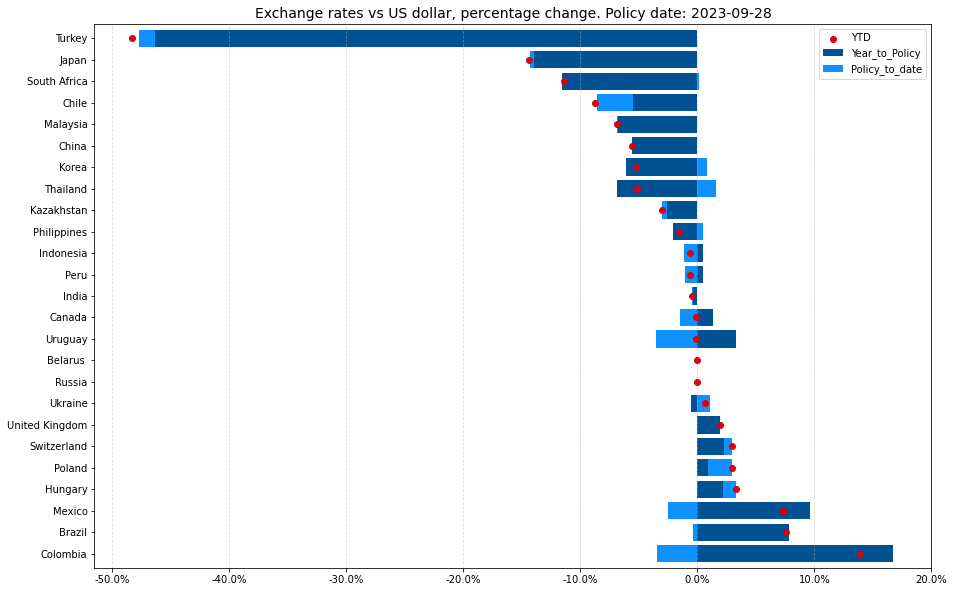

In [229]:
# Crear una gráfica de barras apiladas
Grafica4=[]
fig, ax = plt.subplots(figsize=(15, 10))
colors = ['#005293', '#0F92FF', '#D9030F']
bar_width = 0.8

# Crear barras para 'YtPolicy' y 'Policy_to_date',
ax=df_grafica[['Year_to_Policy','Policy_to_date']].plot.barh(stacked=True, width=bar_width, color=colors[:2], ax=ax)
# Agregar puntos para 'YTD'
ax.scatter(df_grafica['YTD'], df_grafica.index, color=colors[2], label='YTD', zorder=5)

# Configurar el gráfico con estilo Banxico
ax.set_title(f'Exchange rates vs US dollar, percentage change. Policy date: {policy}', fontsize=14)
ax.legend()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))
ax.xaxis.set_major_locator(plt.MultipleLocator(10))  # Espaciado de las líneas verticales tenues
#ax.set_xlim(left=-105, right=25)
ax.grid(axis='x', linestyle='--', alpha=0.5)
Grafica4=fig
plt.show()